### MATH2504 S2, 2023, BigHW Submission 
### Submission form IV of IV 

Student #1 name:

Student #1 ID:

Student #2 name:

Student #2 ID:

GitHub repo: 

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q13)

## 13a:

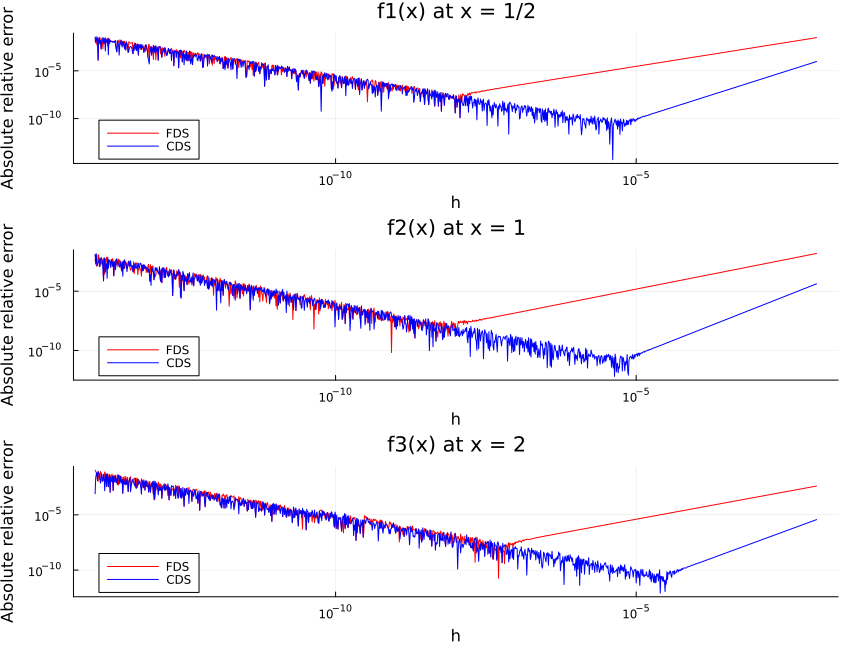

In [142]:
using Plots
diff_forward(f, x; h = sqrt(eps())) = (f(x+h) - f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x + (h/2)) - f(x - (h/2)))/h

f1(x) = cos(x^2)
f1_der(x) = -2*x*sin(x^2)
f2(x) = exp(x^2)
f2_der(x) = 2*x*exp(x^2)
f3(x) = (atan(x))/(1 + exp(-4x^2)) 
f3_der(x) = (1 + exp(-4x^2) + (8*exp(-4x^2) * atan(x) * (x^3 + x)))/((1+exp(-4x^2))^2 * (x^2 + 1))

x1, x2, x3 = 1/2, 1, 2

h_range = 10 .^ (-14:0.01:-2)

errs11 = [abs(diff_forward(f1, x1; h = h) - f1_der(x1))/abs(f1_der(x1)) for h in h_range]
errs12 = [abs(diff_central(f1, x1; h = h) - f1_der(x1))/abs(f1_der(x1)) for h in h_range]

errs21 = [abs(diff_forward(f2, x2; h = h) - f2_der(x2))/abs(f2_der(x2)) for h in h_range]
errs22 = [abs(diff_central(f2, x2; h = h) - f2_der(x2))/abs(f2_der(x2)) for h in h_range]

errs31 = [abs(diff_forward(f3, x3; h = h) - f3_der(x3))/abs(f3_der(x3)) for h in h_range]
errs32 = [abs(diff_central(f3, x3; h = h) - f3_der(x3))/abs(f3_der(x3)) for h in h_range]

p1 = plot(h_range,[errs11 errs12 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["FDS" "CDS"], c = [:red :blue], legend = :bottomright, title = "f1(x) at x = 1/2")

p2 = plot(h_range,[errs21 errs22 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["FDS" "CDS"], c = [:red :blue], legend = :bottomright, title = "f2(x) at x = 1")

p3 = plot(h_range,[errs31 errs32 ], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["FDS" "CDS"], c = [:red :blue], legend = :bottomright, title = "f3(x) at x = 2")

plot(p1, p2, p3, size=(850,650), layout = (3,1), legend=:bottomleft)

## 13b:

Firstly, the Jacobian is defined to be a maxtrix of the partial derivatives of S($z$) with dimension K x K. Using the forward difference scheme, we need to compute $$ \frac{\partial f_i}{\partial z_j} \approx \frac{f_i(z+he_j)-f_i(z)}{h}$$ where $e_j$ is a unit vector in the $j^{th}$ direction. This requires us to evaluate the softmax function twice, once for the vector $z$, and again for the vector $z + he_j$. If every partial derivative in the Jacobian is calculated this way, we end up with $2K^2$ evaluations of the softmax function, because there are K rows and K columns, with each element evaluated twice. 

Similarly, for the central difference scheme, we need to compute $$ \frac{\partial f_i}{\partial z_j} \approx \frac{f_i(z + \frac{h}{2}e_j) - f_i(z - \frac{h}{2}e_j)}{h} $$ where $e_j$ is a unit vector in the $j^{th}$ direction. Like before, we need to evaluate the softmax function twice at each partial derivative, once for $ z + \frac{h}{2} e_j$ and once for $ z - \frac{h}{2} e_j$. We therefore have that the number of softmax evaluations for the central difference scheme is also $2K^2$.

## 13c:

In [72]:
using LinearAlgebra, Plots

function softmax(z)
    s = exp.(z) / sum(exp.(z))
    return s
end

function jacobian(z)
    k = length(z)
    sm = softmax(z)
    J = zeros(k, k)
    for i in 1:k
        for j in 1:k
            J[i,j] = sm[i] * (i == j ? 1 - sm[i] : -sm[j])
        end
    end 
    return J
end

diff_forward(f, x; h = sqrt(eps())) = (f(x.+h) .- f(x))/h
diff_central(f, x; h = sqrt(eps())) = (f(x .+ (h/2)) .- f(x .- (h/2)))/h

function error(approx, explicit)
    return sqrt(sum((approx .- explicit).^2))
end

k_values = [10, 20, 100]
h_range = 10 .^ (-14:0.01:-2)
error_forward = [[],[],[]]
error_central = [[],[],[]]

for k in k_values 
    z = [i.^(1/3) for i in 1:k]
    J_explicit = jacobian(z)

    for_error = Float64[]
    cen_error = Float64[]

    for h in h_range
        J_approx_for = zeros(k,k)
        J_approx_cen = zeros(k,k)

        for j in 1:k 
            J_approx_for[:, j] = diff_forward(softmax, z)[:, j]
            J_approx_cen[:, j] = diff_central(softmax, z)[:, j]
        end

        push!(for_error, error(J_approx_for, J_explicit))
        push!(cen_error, error(J_approx_cen, J_explicit))
    end


p1 = plot(h_range, for_error[1], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["FDS"], c = [:red], legend = :bottomright, title = "K = 10")

p2 = plot(h_range, for_error[2], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["FDS"], c = [:blue], legend = :bottomright, title = "K = 20")

p3 = plot(h_range, for_error[3], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["FDS"], c = [:green], legend = :bottomright, title = "K = 100")

plot(p1, p2, p3, size=(850,650), layout = (3,1), legend=:bottomleft)

p4 = plot(h_range, cen_error[1], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["CDS"], c = [:red], legend = :bottomright, title = "K = 10")

p5 = plot(h_range, cen_error[2], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["CDS"], c = [:blue], legend = :bottomright, title = "K = 20")

p6 = plot(h_range, cen_error[3], yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["CDS"], c = [:green], legend = :bottomright, title = "K = 100")

plot(p4, p5, p6, size=(850,650), layout = (3,1), legend=:bottomleft)

end 


BoundsError: BoundsError: attempt to access 10-element Vector{Float64} at index [1:10, 2]

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

In [59]:
using LinearAlgebra, Plots

# Softmax function
function softmax(z)
    e_z = exp.(z)
    return e_z / sum(e_z)
end

# Jacobian of the softmax function
function jacobian_softmax(z)
    K = length(z)
    S = softmax(z)
    J = zeros(K, K)
    for i in 1:K
        for j in 1:K
            J[i, j] = S[i] * (i == j ? 1 .- S[j] : -S[j])
        end
    end
    return J
end

# Numerical derivative using forward difference
function softmax_diff_forward(f, x; h = sqrt(eps()))
    k = length(z)
    s = softmax(z)
    J = xeros(K,K)
    for j in 1:k 
        z_diff = 
    return (f(x .+ h) .- f(x)) / h
end

# Numerical derivative using central difference
function softmax_diff_central(f, x; h = sqrt(eps()))
    return (f(x .+ (h / 2)) .- f(x .- (h / 2))) / h
end

# Calculate the error between numerical and explicit Jacobian
function calculate_error(numerical, explicit)
    return sqrt(sum(abs2, numerical .- explicit))
end

# Values of K
K_values = [10, 20, 100]

# Initialize arrays to store errors for both schemes
error_forward = [[],[],[]]
error_central = [[],[],[]]

# Loop through each K value
for K in K_values
    z = [i.^(1/3) for i in 1:K]
    J_explicit = jacobian_softmax(z)

    h_range =  10 .^ (-14:0.01:-2) # Range of step sizes
    err_forward = []
    err_central = []

    # Calculate errors for different step sizes
    for h in h_range
        J_numerical_forward = zeros(K, K)
        J_numerical_central = zeros(K, K)

        for j in 1:K
            J_numerical_forward[:, j] = diff_forward(softmax, z)[:, j]
            J_numerical_central[:, j] = diff_central(softmax, z)[:, j]
        end

        push!(err_forward, calculate_error(J_numerical_forward, J_explicit))
        push!(err_central, calculate_error(J_numerical_central, J_explicit))
    end

    push!(error_forward, err_forward)
    push!(error_central, err_central)
end

# Plot errors for different K values
labels = ["K = 10", "K = 20", "K = 100"]
plot(h_range, error_forward[1], label=labels[1], xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error", title="Forward Difference Scheme Error")
plot!(h_range, error_forward[2], label=labels[2])
plot!(h_range, error_forward[3], label=labels[3])

plot(h_range, error_central[1], label=labels[1], xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error", title="Central Difference Scheme Error")
plot!(h_range, error_central[2], label=labels[2])
plot!(h_range, error_central[3], label=labels[3])

BoundsError: BoundsError: attempt to access 10-element Vector{Float64} at index [1:10, 2]

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q14)

In [ ]:
### Answer 14 here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

In [159]:
using LinearAlgebra, DataFrames

function structured_P(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Matrix{Float64}
    q = 1 - p - r
    P = diagm(fill(r,L)) + diagm(-1=>fill(q,L-1)) + diagm(1 => fill(p,L-1))
    P[1,1] = 1-p
    P[L,L] = 1-q
    return P
end

structured_π(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64} = begin
    q = 1 - p - r
    [(p/q)^i  for i in 1:L] * (q-p) / p / (1-(p/q)^L) #Explicit expression (birth death)
end;
    

function method_one(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    #We want to solve π(I - P) = 0 where A = I - P and b = 0 
    P = structured_P(L, p=p, r=r)
    A = I - P
    b = zeros(L)
    A = vcat(A, ones(1, L))
    b = vcat(b, 1)
    return A\b
end 


function method_two(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #create an initial matrix with all zeros in each row and one 1 so that the sum of each row is 1
    initial_π = 1/L * ones(L)
    limit_π = vec(initial_π' * P^n)        
    return limit_π
end 

     

function method_three(L::Int; p::Float64 = 0.45, r::Float64 = 0.01)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    eigenvalues = eigen(P).values
    eigenvectors = eigen(P).vectors
    _, max_eigenvalue = findmax(eigenvalues)
    max_eigenvector = eigenvectors[:, max_eigenvalue]
    return max_eigenvector/sum(max_eigenvector)        
end 



function method_four(L::Int; p::Float64 = 0.45, r::Float64 = 0.01, n::Int = 10^5)::Vector{Float64}
    P = structured_P(L, p=p, r=r)
    #create an initial matrix with all zeros in each row and one 1 so that the sum of each row is 1
    initial_π = 1/L * ones(L)
    x0 = [sample(1:L, Weights(initial_π), 1) ...]
    xN = x[1]

    for i in i:n
        append!(x0, sample(1:L, Weights(P[xN, :]), 1))
        xN = x[end]
    end
    return [sum([x[i] == a for a in 1:n]) for a in 1:L] / n
end

function euclidea_form(L::Int, P::Float64 = 0.45, r::Float64 = 0.01) -= begin 
    calculated_π = 
    explicit_π = structured_π(L, p=p, r=r)



ErrorException: syntax: invalid identifier name "-="

In [135]:
P = structured_P(6)

6×6 Matrix{Float64}:
 0.55  0.45  0.0   0.0   0.0   0.0
 0.54  0.01  0.45  0.0   0.0   0.0
 0.0   0.54  0.01  0.45  0.0   0.0
 0.0   0.0   0.54  0.01  0.45  0.0
 0.0   0.0   0.0   0.54  0.01  0.45
 0.0   0.0   0.0   0.0   0.54  0.46

In [158]:
P = structured_P(2)

π = method_three(2) 

@show sum(π) ≈ 1.0
π

sum(π) ≈ 1.0 = true


2-element Vector{Float64}:
 0.5
 0.5

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q15)

## 15a:

typeof(u) = Vector{Vector{Float64}}


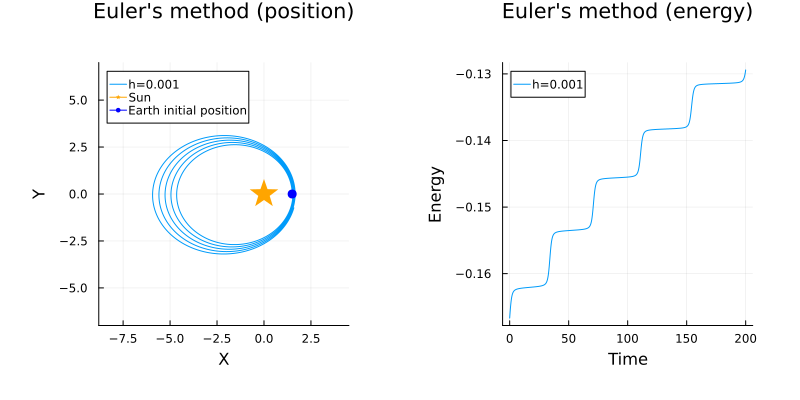

attempt to save state beyond implementation limit


In [36]:
#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]
state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]

"""
Computes the RHS for the one body problem. 
"""
function df_dt_one_body(u::Vector{Float64}, t::Float64)::Vector{Float64}
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

using Plots, Measures

function plot_solution( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Energy"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p1 = plot( x[1:10:length(x)], y[1:10:length(y)], label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))
    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")

    p4 = plot(  t[1:100:length(t)], E[1:10:length(E)], xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")
    plot(p1, p4, margin = 10mm,size=(800,400))
end;

using Serialization, HTTP
h = 0.001
t = 0:h:200
u_0 = [0., 1, 1.5, 0]

#Note: the data was written to file via serialize("data/example_trajectory.dat", u) and then committed to GitHub
ode_web = HTTP.request("GET","https://github.com/yoninazarathy/"*
                            "ProgrammingCourse-with-Julia-SimulationAnalysisAndLearningSystems/"*
                            "raw/e71c6d085e0fcf79e3737c3a1db0fc56904e3f10/data/example_trajectory.dat")
u = deserialize(IOBuffer(ode_web.body))
@show typeof(u)
plot_solution(t,u,title = "Euler's method", label="h=$h")

## 15b:

In [ ]:
### Answer 15b here (in place of this comment)

## 15c:

In [ ]:
### Answer 15c here (in place of this comment)

## 15d:

In [ ]:
### Answer 15d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q16)

## 16a:

In [ ]:
### Answer 16a here (in place of this comment)

## 16b:

In [ ]:
### Answer 16b here (in place of this comment)

## 16c:

In [ ]:
### Answer 16c here (in place of this comment)

## 16d:

In [ ]:
### Answer 16d here (in place of this comment)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2023/assessment_html/bighw.html#q17)

In [ ]:
# Convert this cell to a markdown cell and answer question 17 here in paragraph form.